In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import calendar
%matplotlib inline
sns.set_style("white", {'axes.grid' : True})
sns.set_palette("tab10", 14)
sns.set_context('talk')

In [2]:
# Reading in the data including uber data
data=pd.read_csv('data_uber.csv')
data.head()

,ride_id,travel_time,max_capacity,number_of_ticket,daily_mean,daily_min,daily_max,tf_mean,tf_min,tf_max,...,travel_from_Sori,car_type_Bus,car_type_shuttle,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed
0,1442,7.250000,49,1.0,2734.0,1947.0,4061.0,2978.0,2014.0,4864.0,...,0,1,0,0,0,0,0,0,1,0
1,14304,5.166667,49,1.0,2974.0,1806.0,5122.0,3011.0,1859.0,5007.0,...,0,1,0,0,0,0,0,0,1,0
2,5437,7.200000,49,1.0,1905.0,1437.0,2598.0,1921.0,1439.0,2651.0,...,0,1,0,0,0,0,1,0,0,0
3,5710,7.083333,49,1.0,2181.0,1474.0,3350.0,2115.0,1458.0,3133.0,...,0,1,0,0,0,0,1,0,0,0
4,13577,9.000000,11,11.0,3121.0,1634.0,6066.0,3634.0,1840.0,7340.0,...,0,0,1,0,1,0,0,0,0,0


In [3]:
# Separating out the original train and test set from the source data
train_X = data[data['number_of_ticket'].notnull()]
train_y = train_X['number_of_ticket']
del train_X['number_of_ticket']
del train_X['ride_id']

# Creating the test set
test_X =  data[data['number_of_ticket'].isnull()]
# creating a series for test_X ride_id to use when creating submissions
ride_id_df = test_X['ride_id']
del test_X['number_of_ticket']
del test_X['ride_id']

In [4]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)

(6249, 34)
(6249,)
(1111, 34)


# Building the model - Random forests out of box

In [5]:
# Name and set parameters for the model out of the box - in theis case a random forest
forest_model = RandomForestRegressor(random_state=1, criterion ='mae')
# Fit the model to the training data
forest_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [6]:
# Making predictions for the first few rows of the training set or sanity check
print("The predictions of the first five rows are", forest_model.predict(train_X.head()))

The predictions of the first five rows are [17.5   1.2   7.2   2.    9.65]


In [7]:
# Now run the model on the training set and see what it predicts
forest_model_preds = forest_model.predict(train_X)
# Compare the predctions with the actual training values using mae as specified int he competition
print ('mae: run on full training set',mean_absolute_error(forest_model_preds, train_y))
# generated score - level of accuracy 
print ('train score:', forest_model.score( train_X , train_y ))

mae: run on full training set 1.569323091694671
train score: 0.9011774775167772


In [8]:
# Run the model on the Zindi test set 
forest_model_pred_y = forest_model.predict(test_X)

In [9]:
# creating the csv
submission_data = {'ride_id': ride_id_df, 'number_of_ticket': forest_model_pred_y}
submission_data = pd.DataFrame(data=submission_data)
submission_data = submission_data[['ride_id','number_of_ticket']]
submission_data.head()

,ride_id,number_of_ticket
6249,13856,20.0
6250,13857,2.5
6251,13847,5.5
6252,13859,8.7
6253,13855,11.7


In [10]:
submission_data.to_csv('nairobi_uber_rf0.csv', index=False) #save to csv file

In [11]:
# date 7/11/18
# Results on Zindi 4.1805
# Position
# Learning points

# Creating a single validation set from within the training set.

In [13]:
# set the validation model with train_v_X being the training element, valied_X being the test element and same for y
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
train_v_X , test_v_X , train_v_y , test_v_y = train_test_split( train_X , train_y , test_size = .2, random_state=0 )
# Printing the shape of the
print( train_v_X.shape, train_v_y.shape)
print (test_v_X.shape, test_v_y.shape)

(4999, 34) (4999,)
(1250, 34) (1250,)


In [14]:
# Creat a new model (forest_model1) based on the validation training set to test on validation set
# Name and set parameters for the model out of the box - in theis case a random forest
forest_model1 = RandomForestRegressor(random_state=1, criterion ='mae')

In [15]:
# Fit the random forest model to the train validation data
forest_model1.fit(train_v_X, train_v_y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [16]:
# How did the model perform on the test valudation data
forest_model1_val_preds = forest_model1.predict(test_v_X)
forest_model1_val_preds[0:5]

array([18.9,  3.7,  2.1,  4. ,  2.2])

In [17]:
# Compare the predctions with the validation test results ie test_v_y
print ('mae between validation results and validation test data:',mean_absolute_error(forest_model1_val_preds, test_v_y))
# generated score - level of accuracy but not sure how its measured
print ('validation test score:', forest_model1.score( test_v_X , test_v_y ))

mae between validation results and validation test data: 3.62788
validation test score: 0.5292437509665859


In [18]:
# Running on the final Zindi set
# Run the model on the test set 
forest_model1_pred_y = forest_model1.predict(test_X)

In [19]:
# creating the csv
submission_data = {'ride_id': ride_id_df, 'number_of_ticket': forest_model1_pred_y}
submission_data = pd.DataFrame(data=submission_data)
submission_data = submission_data[['ride_id','number_of_ticket']]
submission_data.head()

,ride_id,number_of_ticket
6249,13856,17.7
6250,13857,4.8
6251,13847,4.4
6252,13859,8.6
6253,13855,10.4


In [20]:
submission_data.to_csv('predictions2_rf1_validation.csv', index=False) #save to csv file

In [21]:
print('Model 0: mae on self', mean_absolute_error(forest_model_preds, train_y))
# print ('Model 0: train score / test score', forest_model.score( forest_model_preds, train_y ))
print('Model 1: mae on validation data', mean_absolute_error(forest_model1_val_preds, test_v_y))
print ('Model 1: train score / test score', forest_model1.score( train_v_X , train_v_y ) , forest_model1.score( test_v_X , test_v_y ))

Model 0: mae on self 1.569323091694671
Model 1: mae on validation data 3.62788
Model 1: train score / test score 0.8967692061262742 0.5292437509665859


In [22]:
# Results on Zindi
# Position
# Learning points
# Comments: 
# The scores based on validation data were lower than those acheived when tested on itself suggesting
# overfitting in the first test above. This is to be expected considering its tested on itself. 
# Otherwise results were quite reasonable

# Results of running the model on Zindi were lower than achieved using full training set as based on a smaller sample. As expected.

### Exploring the effect of a few variable tweaks and graphing them
 https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

## max-leaf nodes

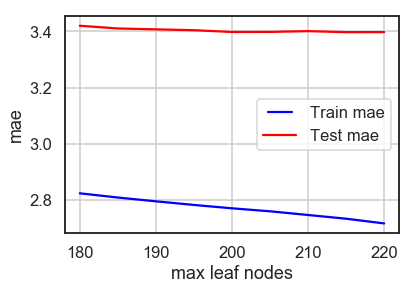

In [23]:
# estimators we want to try
max_leaf_node = [ 180, 185, 190, 195, 200, 205, 210, 215, 220 ]
# empty list for results
train_results = []
test_results = []
# for loop to fit the rf regressor to each n_estimator, generate a training and testing score
for node in max_leaf_node:
    forest_model4 = RandomForestRegressor(max_leaf_nodes=node, n_jobs=-1, random_state=0, criterion ='mae')
    forest_model4.fit(train_v_X, train_v_y)
    train_pred = forest_model4.predict(train_v_X)
    my_train_mae = mean_absolute_error(train_v_y, train_pred)
    train_results.append(my_train_mae)
    y_pred = forest_model4.predict(test_v_X)
    my_test_mae = mean_absolute_error(test_v_y, y_pred)
    test_results.append(my_test_mae)
# Plot the results
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_leaf_node, train_results, 'b', label='Train mae')
line2, = plt.plot(max_leaf_node, test_results, 'r', label='Test mae')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mae')
plt.xlabel('max leaf nodes')
plt.show()
# 200 looks to be optimal

# N-estimators

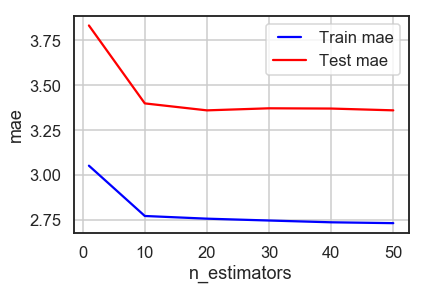

In [24]:
# n_estimators represents the number of trees in the forest. 
# Usually the higher the number of trees the better to learn the data. 
# However, adding a lot of trees can slow down the training process considerably, 
# therefore we do a parameter search to find the sweet spot

# estimators we want to try
n_estimators = [1, 10, 20, 30, 40, 50]
# empty list for results
train_results = []
test_results = []
# for loop to fit the rf regressor to each n_estimator, generate a training and testing score
for estimator in n_estimators:
    rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1, random_state=0, criterion ='mae', max_leaf_nodes = 200)
    rf.fit(train_v_X, train_v_y)
    train_pred = rf.predict(train_v_X)
    my_train_mae = mean_absolute_error(train_v_y, train_pred)
    train_results.append(my_train_mae)
    y_pred = rf.predict(test_v_X)
    my_test_mae = mean_absolute_error(test_v_y, y_pred)
    test_results.append(my_test_mae)
# Plot the results
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train mae')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test mae')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mae')
plt.xlabel('n_estimators')
plt.show()

# hard to say if it matters much but 20 looks good

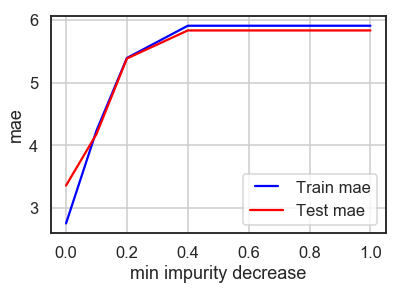

In [26]:
# mean decrease_impurity
decreases = [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
# empty list for results
train_results = []
test_results = []
# for loop to fit the rf regressor to each n_estimator, generate a training and testing score
for decrease in decreases:
    rf = RandomForestRegressor(min_impurity_decrease=decrease, n_estimators =20, n_jobs=-1, random_state=0, criterion ='mae', max_leaf_nodes = 200)
    rf.fit(train_v_X, train_v_y)
    train_pred = rf.predict(train_v_X)
    my_train_mae = mean_absolute_error(train_v_y, train_pred)
    train_results.append(my_train_mae)
    y_pred = rf.predict(test_v_X)
    my_test_mae = mean_absolute_error(test_v_y, y_pred)
    test_results.append(my_test_mae)
# Plot the results
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(decreases, train_results, 'b', label='Train mae')
line2, = plt.plot(decreases, test_results, 'r', label='Test mae')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('mae')
plt.xlabel('min impurity decrease')
plt.show()



## min_samples_split

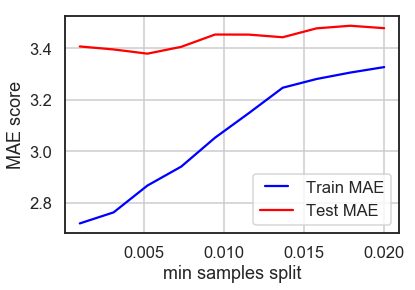

In [27]:
# min_samples_split represents the minimum number of samples required to split an internal node. 
# This can vary between considering at least one sample at each node to considering all of the samples at each node. 
# When we increase this parameter, each tree in the forest becomes more constrained as it has to consider 
# more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

min_samples_splits = np.linspace(0.001, 0.02,10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestRegressor(min_samples_split=min_samples_split, n_estimators=20, max_depth=None , max_leaf_nodes = 200, criterion ='mae')
    rf.fit(train_v_X, train_v_y)
    train_pred = rf.predict(train_v_X)
    my_train_mae = mean_absolute_error(train_v_y, train_pred)
    train_results.append(my_train_mae)
    y_pred = rf.predict(test_v_X)
    my_test_mae = mean_absolute_error(test_v_y, y_pred)
    test_results.append(my_test_mae)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train MAE')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('min samples split')
plt.show()
# Looks like 0.008 of sample is the minimum
# In practice this should be set as 2, the minimum value allowed

## max_depth

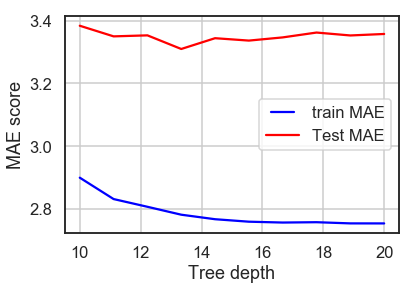

In [28]:
# max_depth represents the depth of each tree in the forest. 
# The deeper the tree, the more splits it has and it captures more information about the data. 
# We fit each decision tree with depths ranging from 1 to 32 and plot the training and test errors.

max_depths = np.linspace(10, 20, 10, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestRegressor(max_depth=max_depth, n_jobs=-1, random_state=0, n_estimators=20, max_leaf_nodes = 200, criterion ='mae')
    rf.fit(train_v_X, train_v_y)
    train_pred = rf.predict(train_v_X)
    my_train_mae = mean_absolute_error(train_v_y, train_pred)
    train_results.append(my_train_mae)
    y_pred = rf.predict(test_v_X)
    my_test_mae = mean_absolute_error(test_v_y, y_pred)
    test_results.append(my_test_mae)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='train MAE')
line2, = plt.plot(max_depths, test_results, 'r', label='Test MAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MAE score')
plt.xlabel('Tree depth')
plt.show()

# 13 looks good enough

## Using results from above to run full model

In [29]:
forest_model5 = RandomForestRegressor(max_depth=13, n_jobs=-1, random_state=0, n_estimators=20, max_leaf_nodes = 200, criterion ='mae')
forest_model5.fit(train_v_X, train_v_y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=13,
           max_features='auto', max_leaf_nodes=200,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [30]:
train_pred = rf.predict(train_v_X)

In [31]:
forest_model5_y_pred = forest_model5.predict(test_v_X)

In [32]:
# print('Model 0: mae on self', mean_absolute_error(forest_model_preds, train_y))
# print ('Model 0: train score / test score', forest_model.score( train_v_X , train_v_y ) , forest_model.score( test_v_X , test_v_y ))
# print('Model 1: mae on validation data', mean_absolute_error(forest_model1_val_preds, test_v_y))
# print ('Model 1: train score / test score', forest_model1.score( train_v_X , train_v_y ) , forest_model1.score( test_v_X , test_v_y ))
# # print('Model 2: mae on self', mean_absolute_error(forest_model2_preds, train_y))
# # print ('Model 2: train score / test score', forest_model2.score( train_v_X , train_v_y ) , forest_model2.score( test_v_X , test_v_y ))
# print('Model 3: mae on validation data', mean_absolute_error(forest_model3_preds, test_v_y))
# print ('Model 3: train score / test score', forest_model3.score( train_v_X , train_v_y ) , forest_model3.score( test_v_X , test_v_y ))
print('Model 5: mae on validation data', mean_absolute_error(forest_model5_y_pred, test_v_y))
print ('Model 5: train score / test score', forest_model5.score( train_v_X , train_v_y ) , forest_model5.score( test_v_X , test_v_y ))

Model 5: mae on validation data 3.3099
Model 5: train score / test score 0.711556371078421 0.5835351382306724


# Introducing a randomizedsearchcv - on validation training set only

In [33]:
# https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_random_search/

In [34]:
#setting the hyperparameters to  use in the gridsearch
# Format for setting hperparamets is using a python dictionary with the hyperparamter names given and the  teh balues are lists
# of settings to try
hyperparameters = { # maximum depth of the tree
                    'max_depth': [13, 15, 20, None],
                    # NUmber of features to consider when looking for he best split
                   'max_features': ['auto', 'sqrt', 'log2'],
                    # Not sure what this means, it relatest o purity
                   'max_leaf_nodes': [ 250, 500, 1000, None],
                   # NUmber of trees in the forest
                   'n_estimators': [ 30, 50, 100, 1000], 
                   # Number of processes to run simultaneously, -1 means use as many processors as there are 
                   'n_jobs': [-1],
                    }

In [35]:
forest_model6 = RandomForestRegressor(random_state=1, n_jobs=-1, criterion='mae')

In [36]:
# Create randomized search 5-fold cross validation and 100 iterations
rscv = RandomizedSearchCV(forest_model6, hyperparameters, random_state=1, cv=8, verbose=0, n_jobs=-1)

In [37]:
# Fit randomized search
forest_model7 = rscv.fit(train_v_X, train_v_y)

In [38]:
print('Best parameter', forest_model7.best_estimator_.get_params())

Best parameter {'bootstrap': True, 'criterion': 'mae', 'max_depth': 13, 'max_features': 'auto', 'max_leaf_nodes': 1000, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [40]:
# Predict training set results
forest_model7_v_train_preds = forest_model7.predict(train_v_X)

In [41]:
# Compare the predctions with the validation test results ie test_v_y
print ('mae between validation results and validation test data:',mean_absolute_error(forest_model7_v_train_preds, train_v_y))
# generated score - level of accuracy but not sure how its measured
print ('validation test score:', forest_model7.score( train_v_X , train_v_y ))

mae between validation results and validation test data: 2.37452300460092
validation test score: 0.780137481136187


In [42]:
# Now run the model on the validation set 
forest_model7_v_test_preds = forest_model7.predict(test_v_X)

In [43]:
print('Model 5: mae on validation data', mean_absolute_error(forest_model5_y_pred, test_v_y))
print ('Model 5: train score / test score', forest_model5.score( train_v_X , train_v_y ) , forest_model5.score( test_v_X , test_v_y ))
# Model 6 is just a blank canvas to enter into the cross validation randomiser
print('Model 7: mae on validation train data', mean_absolute_error(forest_model7_v_train_preds, train_v_y))
print('Model 7: mae on validation test data', mean_absolute_error(forest_model7_v_test_preds, test_v_y))
print ('Model 7: train score / test score', forest_model7.score( train_v_X , train_v_y ) , forest_model7.score( test_v_X , test_v_y ))

Model 5: mae on validation data 3.3099
Model 5: train score / test score 0.711556371078421 0.5835351382306724
Model 7: mae on validation train data 2.37452300460092
Model 7: mae on validation test data 3.3596199999999996
Model 7: train score / test score 0.780137481136187 0.5910192656791344


## Running on the full set using model7

In [52]:
# Running on the final Zindi set
# Run the model on the test set 
forest_model7_pred_y = forest_model7.predict(test_X)

In [53]:
# creating the csv
submission_data = {'ride_id': ride_id_df, 'number_of_ticket': forest_model7_pred_y}
submission_data = pd.DataFrame(data=submission_data)
submission_data = submission_data[['ride_id','number_of_ticket']]
submission_data.head()

,ride_id,number_of_ticket
6249,13856,20.3715
6250,13857,3.1495
6251,13847,4.9745
6252,13859,9.1735
6253,13855,7.7550


In [54]:
submission_data.to_csv('nairobi_uber_rf_7.csv', index=False) #save to csv file

In [ ]:
# Zindi score for forest_model7 3.9275

# Introducing a randomizedsearchcv - on all the data forest_model8

In [45]:
#setting the hyperparameters to  use in the gridsearch
# Format for setting hperparamets is using a python dictionary with the hyperparamter names given and the  teh balues are lists
# of settings to try
hyperparameters = { # maximum depth of the tree
                    'max_depth': [13, 15,20, None],
                    # NUmber of features to consider when looking for he best split
                   'max_features': ['auto', 'sqrt', 'log2'],
                    # Not sure what this means, it relatest o purity
                   'max_leaf_nodes': [200, 250, 300, 350, None],
                   # NUmber of trees in the forest
                   'n_estimators': [ 25, 27, 30, 100, 1000], 
                   # Number of processes to run simultaneously, -1 means use as many processors as there are 
                   'n_jobs': [-1],
                    }

In [46]:
forest_model6 = RandomForestRegressor(random_state=1, n_jobs=-1, criterion='mae')

In [47]:
# Create randomized search 5-fold cross validation and 100 iterations
rscv = RandomizedSearchCV(forest_model6, hyperparameters, random_state=1, cv=8, verbose=0, n_jobs=-1)

In [48]:
# Fit randomized search
forest_model8 = rscv.fit(train_X, train_y)

In [49]:
print('Best parameter', forest_model8.best_estimator_.get_params())

Best parameter {'bootstrap': True, 'criterion': 'mae', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': 300, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [50]:
# Predict training set results
forest_model8_train_preds = forest_model8.predict(train_X)

In [51]:
# Compare the predctions with the validation test results ie test_v_y
print ('mae between validation results and validation test data:',mean_absolute_error(forest_model8_train_preds, train_y))
# generated score - level of accuracy but not sure how its measured
print ('validation test score:', forest_model8.score( train_X , train_y ))

mae between validation results and validation test data: 3.2370267242758843
validation test score: 0.6455166147995436


## Running on the full set using model8

In [55]:
# Running on the final Zindi set
# Run the model on the test set 
forest_model8_pred_y = forest_model8.predict(test_X)

In [56]:
# creating the csv
submission_data = {'ride_id': ride_id_df, 'number_of_ticket': forest_model8_pred_y}
submission_data = pd.DataFrame(data=submission_data)
submission_data = submission_data[['ride_id','number_of_ticket']]
submission_data.head()

,ride_id,number_of_ticket
6249,13856,19.41
6250,13857,4.88
6251,13847,9.62
6252,13859,6.37
6253,13855,5.23


In [57]:
submission_data.to_csv('nairobi_uber_rf_8.csv', index=False) #save to csv file

In [ ]:
# Zindi score for forest_model8 4.1755